In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from  sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [152]:
df=pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [154]:
x=df[["text","label"]]
x.dropna(axis=0,inplace=True)
x.describe()

,label
count,20761.000000
mean,0.499687
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [155]:
y=x.label
x=x.text

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [157]:
cv=CountVectorizer(stop_words="english", min_df=0.002,max_df=.5)
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [158]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.33)

In [159]:
tf=TfidfVectorizer(stop_words="english")
x_train2=tf.fit_transform(x_train2)
x_test2=tf.transform(x_test2)

## CountVectorizer Naivebayes calssifier

In [160]:
model=MultinomialNB()
model2=MultinomialNB()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [161]:
accuracy=metrics.accuracy_score(y_test,prediction)
accuracy

0.8911266783420899

In [162]:
from sklearn.metrics import confusion_matrix 


In [163]:
cm=confusion_matrix(y_test,prediction)
cm

array([[3179,  244],
       [ 502, 2927]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

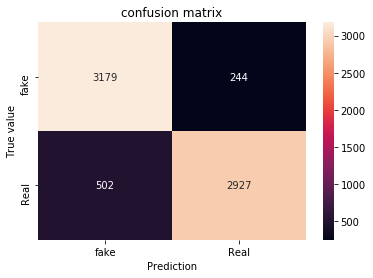

In [164]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=["fake","Real"],yticklabels=["fake","Real"])
plt.ylabel("True value")
plt.xlabel("Prediction")
plt.title("confusion matrix")

## tfidf Vectorizer Naivebayes calssifier



In [165]:
model2.fit(x_train2,y_train2)
prediction2=model2.predict(x_test2)
accuracy=metrics.accuracy_score(y_test2,prediction2)
accuracy

0.8552247518972563

In [166]:
cm=confusion_matrix(y_test2,prediction2)
cm

array([[3383,   40],
       [ 952, 2477]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

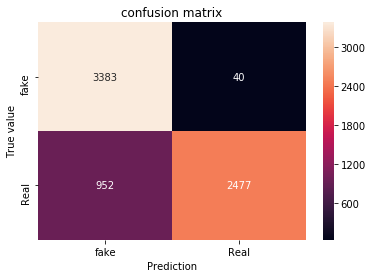

In [167]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=["fake","Real"],yticklabels=["fake","Real"])
plt.ylabel("True value")
plt.xlabel("Prediction")
plt.title("confusion matrix")

## CountVectorizer passive aggresive calssifier

In [168]:
model3=PassiveAggressiveClassifier()
model3.fit(x_train,y_train)
prediction3=model3.predict(x_test)
accuracy=metrics.accuracy_score(y_test,prediction3)
accuracy

0.9352014010507881

In [169]:
cm=confusion_matrix(y_test,prediction3)
cm

array([[3174,  249],
       [ 195, 3234]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

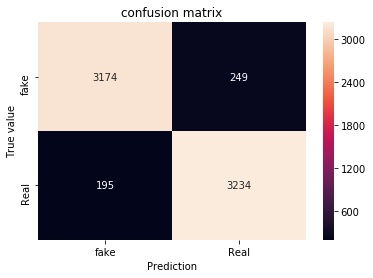

In [170]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=["fake","Real"],yticklabels=["fake","Real"])
plt.ylabel("True value")
plt.xlabel("Prediction")
plt.title("confusion matrix")

## tfidf Vectorizer passive aggresive calssifier

In [171]:
model4=PassiveAggressiveClassifier(n_iter=50)
model4.fit(x_train2,y_train2)
prediction4=model4.predict(x_test2)
accuracy=metrics.accuracy_score(y_test2,prediction4)
accuracy

0.9603035610040864

In [172]:
cm=confusion_matrix(y_test2,prediction4)
cm

array([[3287,  136],
       [ 136, 3293]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

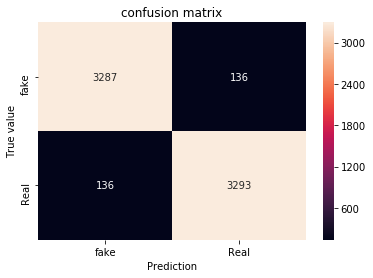

In [173]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='g',xticklabels=["fake","Real"],yticklabels=["fake","Real"])
plt.ylabel("True value")
plt.xlabel("Prediction")
plt.title("confusion matrix")

## For different aplha in tfidf vectorizer

In [174]:
f_alpha=0
maximum=0
for alpha in range(11):
    model5=MultinomialNB(alpha=alpha*0.1)
    model5.fit(x_train2,y_train2)
    prediction5=model5.predict(x_test2)
    acc=metrics.accuracy_score(y_test2,prediction5)
    print(acc)
    if maximum<acc:
        f_alpha=alpha*.1
        maximum=acc

print("optimal alpha={},accuracy={}".format(f_alpha,maximum))

0.8774080560420315
0.9042615294804437
0.8976941039112668
0.8901050788091068
0.8833917104495038
0.8781377699941623
0.8724460011675423
0.8682136602451839
0.8636894337419732
0.8596030356100408
0.8552247518972563
optimal alpha=0.1,accuracy=0.9042615294804437


## For differnt iterations for tf-idf vectorizer Passive agressive classifier 

In [175]:
f_epoch=0
max_acc=0
for epoch in range(50):
    model6=PassiveAggressiveClassifier(n_iter=epoch)
    model6.fit(x_train2,y_train2)
    prediction6=model6.predict(x_test2)
    accuracy=metrics.accuracy_score(y_test2,prediction6)
    #print(accuracy)
    if accuracy>max_acc:
        f_epoch=epoch
        max_acc=accuracy
print("optimal n_iter={} ,accuracy={}".format(f_epoch,max_acc))

optimal n_iter=33 ,accuracy=0.9611792177466433
